In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Since our "2024 UW ENGINE Capstone" drive folder is inside share with me folder which can't be directly access from Google Colab through MyDrive path, we have a way to walk around with this:
1.   Go to "Shared with me" on the left navigation bar of Google Drive
2.   Find the folder named "2024 UW ENGINE Capstone"
3.   Right click or click on 3 vertical dots, then Organize > Add shortcut > All locations > Choose the MyDrive > Click Add.
4.   Now you can access the '2024 UW ENGINE Capstone' folder from Google Colab.



In [ ]:
%cd /content/drive/MyDrive/'2024 UW ENGINE Capstone'

/content/drive/.shortcut-targets-by-id/1oyb6sI_Gh8b_o0AIjqSCq4UljphkuJTI/2024 UW ENGINE Capstone


In [ ]:
!ls data/'SuperMAG & NERC'/raw/
!ls data/OMNI/raw/
!ls data/NERC_GCI/raw/

resample_2010.csv  resample_2013.csv  resample_2016.csv  resample_2019.csv  resample_2022.csv
resample_2011.csv  resample_2014.csv  resample_2017.csv  resample_2020.csv  resample_2023.csv
resample_2012.csv  resample_2015.csv  resample_2018.csv  resample_2021.csv
IMF_CLOCK_ANGLE_2010.csv  IMF_CLOCK_ANGLE_2015.csv  IMF_CLOCK_ANGLE_2020.csv
IMF_CLOCK_ANGLE_2011.csv  IMF_CLOCK_ANGLE_2016.csv  IMF_CLOCK_ANGLE_2021.csv
IMF_CLOCK_ANGLE_2012.csv  IMF_CLOCK_ANGLE_2017.csv  IMF_CLOCK_ANGLE_2022.csv
IMF_CLOCK_ANGLE_2013.csv  IMF_CLOCK_ANGLE_2018.csv  IMF_CLOCK_ANGLE_2023.csv
IMF_CLOCK_ANGLE_2014.csv  IMF_CLOCK_ANGLE_2019.csv  OMNI_2010_2023.csv
2023GCIData.csv


In [ ]:
import pandas as pd

From SM data, we will need:

* datetime
* glon
* glat
* mlon
* mlat
* mlt  
* dbn_nez
* dbe_nez

From OMNI:

* DateTime
* BX_GSE
* BY_GSM
* BZ_GSM
* flow_speed
* proton_density
* T
* Pressure
* clock angle of the IMF(θc)



# Construct Machine Learning model: Multivariate Linear Regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [ ]:
# Loading dataset
BASE_PATH = "/content/drive/MyDrive/2024 UW ENGINE Capstone/data/"

dataset_2023 = pd.read_csv(BASE_PATH + "ML/dataset_2023.csv")
# dataset_2022 = pd.read_csv(BASE_PATH + "ML/dataset_2022.csv")

In [ ]:
# dataset_2023_2022 = pd.concat([dataset_2023, dataset_2022], ignore_index=True)

In [ ]:
# Prepare dataset - split into train, validation and test set

# print(len(dataset_2023))
# print(len(dataset_2022))
# dataset_2023_2022
dataset_2023

,datetime,glon,glat,mlon,mlat,mlt,dbn_nez,dbe_nez,BX_GSE,BY_GSM,BZ_GSM,flow_speed,proton_density,T,Pressure,SYM_H,CLOCK_ANGLE_GSM
0,2023-01-01 00:00:00,76.920,43.25,150.22480,38.829740,4.822747,-5.191732,-1.308365,-3.62,3.15,1.22,579.7,2.250000,91629.000000,1.510000,-21,77.30
1,2023-01-01 00:05:00,76.920,43.25,150.22480,38.829740,4.906712,-3.528307,-0.557304,-3.27,3.70,-0.89,593.7,2.320000,113414.000000,1.640000,-21,94.18
2,2023-01-01 00:10:00,76.920,43.25,150.22480,38.829740,4.991168,-4.890139,1.993851,-3.61,3.29,0.28,575.2,2.320000,96954.000000,1.540000,-21,91.56
3,2023-01-01 00:15:00,76.920,43.25,150.22480,38.829740,5.075914,-3.516126,1.228974,-2.98,3.87,-0.02,588.5,2.290000,87054.000000,1.590000,-21,85.88
4,2023-01-01 00:20:00,76.920,43.25,150.22480,38.829740,5.160800,-3.579557,1.258778,-0.39,5.01,-1.07,601.8,2.610000,105869.000000,1.870000,-21,100.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7421162,2023-05-26 01:50:00,245.518,62.48,-56.85418,69.424225,17.354526,82.314190,0.890782,2.39,0.10,-2.55,512.0,1.550000,136874.000000,0.820000,-17,175.34
7421163,2023-05-26 01:55:00,245.518,62.48,-56.85418,69.424225,17.432081,70.770140,17.823336,2.91,-0.10,-2.20,490.9,1.580000,130945.000000,0.760000,-17,181.70
7421164,2023-05-26 02:00:00,245.518,62.48,-56.85418,69.424225,17.509791,79.602571,32.362805,1.76,-1.19,-3.51,503.9,1.560000,145751.000000,0.790000,-18,195.40
7421165,2023-05-26 02:05:00,245.518,62.48,-56.85418,69.424225,17.587575,85.544673,45.955596,1.87,-0.58,-3.32,500.1,1.586667,145173.333333,0.793333,-19,188.32


In [ ]:
y_columns = ["dbn_nez", "dbe_nez"]
x_columns = dataset_2023.columns.difference(["dbn_nez", "dbe_nez", "datetime"])

train, test = train_test_split(dataset_2023, test_size=0.2, shuffle=False)

x_train = train[x_columns]
y_train = train[y_columns]

x_test = test[x_columns]
y_test = test[y_columns]

In [ ]:
# define model
model = LinearRegression()
# fit model
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predict = model.predict(x_test)
# summarize prediction
print(y_predict)

[[-20.43877249  -2.38092782]
 [-19.11294311  -2.43418782]
 [-18.65973545  -2.50842307]
 ...
 [ -7.23021206  -2.1303456 ]
 [ -7.56623818  -2.13397484]
 [ -8.89154891  -2.1424999 ]]


In [ ]:
print(y_test)

           dbn_nez    dbe_nez
5936933  -1.807368  24.573513
5936934   0.306569  21.950347
5936935  -0.816443  18.453739
5936936  -4.592914  18.797469
5936937  -7.302943  17.123943
...            ...        ...
7421162  82.314190   0.890782
7421163  70.770140  17.823336
7421164  79.602571  32.362805
7421165  85.544673  45.955596
7421166  92.803855  41.331915

[1484234 rows x 2 columns]


In [ ]:
mean_squared_error(y_test, y_predict, multioutput='raw_values')

array([2320.38850272, 1015.30916512])

In [ ]:
print('dbn_nez mse:', mean_squared_error(y_test.iloc[:, 0], y_predict[:, 0]))

dbn_nez mse: 2320.3885027241936


In [ ]:
print('dbe_nez mse:', mean_squared_error(y_test.iloc[:, 1], y_predict[:, 1]))

dbe_nez mse: 1015.3091651151777


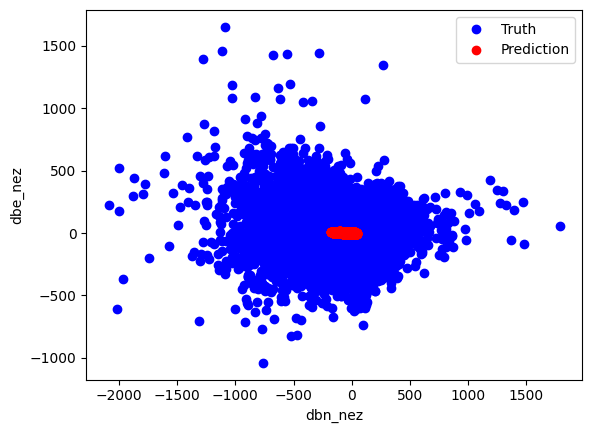

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test.iloc[:, 0], y_test.iloc[:, 1], 'bo', label='Truth')
plt.plot(y_predict[:, 0], y_predict[:, 1], 'ro', label='Prediction')
plt.xlabel('dbn_nez')
plt.ylabel('dbe_nez')
plt.legend()
plt.show()

In [ ]:
# A: mlon - 1, mlat-2
# B: mlon - 1, mlat-2

# --> same magnetic pertu. # A: mlon - 1, mlat-2
# B: mlon - 1, mlat-2

# --> same magnetic pertubation? Or Not?